In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) data load

In [26]:
dataset = pd.read_csv('data/Salary_Data.csv')
print(dataset)
print(dataset.shape)
print(type(dataset))

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
(30, 2)
<class 'pandas.core.frame.DataFrame'>


### 2) feature(X)와 actual value(y) 분리

In [37]:
# YearsExperience(경력(년))으로 Salary(연봉) 예측하는 모델
# X = YearsExperience
# y = Salary

# dataset: DataFrame
# DataFrame을 slicing하기 위해서는 iloc(또는 loc)를 사용해야 함

# X: 전체 행, 0번 열 → dnarray로 변환(values)
X = dataset.iloc[:,:-1].values
# [:,:-1] → 전체 행, 마지막 열 제외 전체 열 (첫 열부터 마지막으로부터 두번째 열까지)
# [범위, 범위] → 2D
# [index, 범위] 또는 [범위, index] → 1D
# sklearn에서 X는 2D를 사용: [:,0]으로 지정할 경우, 1D가 되므로 index 0대신 범위로 지정

# y: 전체 행, 1번 열 → dnarray로 변환(values)
y = dataset.iloc[:,-1:].values
# y의 경우 1D, 2D 모두 가능

print(X.shape, y.shape)

(30, 1) (30, 1)


### 3) training / test data 분리

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [29]:
# shape 확인
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(6, 1)
(6, 1)


### 4) linear regression model 생성

In [30]:
from sklearn.linear_model import LinearRegression
sLR = LinearRegression()
# Linear Regression 객체 생성

In [31]:
# Linear Regression 학습 (학습데이터(training X, training y) 적용)
# sklearn의 machine learning model의 X는 2D여야 함
sLR.fit(X_train, y_train)
# 학습의 결과는 sLR에 저장됨

LinearRegression()

### 5) prediction

In [32]:
# predict에 새로운 x를 전달하면 prediction 반환
# x를 2D로 전달(list 또는 ndarray)
sLR.predict([[6.5]])

array([[86576.38261148]])

In [33]:
# test data 전체에 대한 prediction
y_pred = sLR.predict(X_test)
print(y_pred)

[[115790.21011287]
 [ 71498.27809463]
 [102596.86866063]
 [ 75267.80422384]
 [ 55477.79204548]
 [ 60189.69970699]]


### 6) 결과 시각화

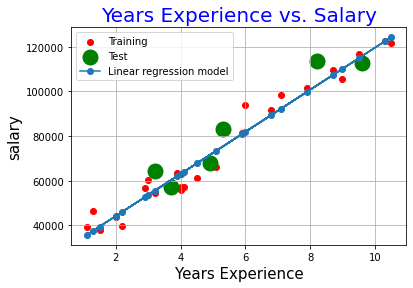

In [34]:
# 가로축: X(YearsExperience), 세로축: y(Salary)
# training data (X_train, y_train) 산점도
plt.scatter(X_train, y_train, color = 'red', label = 'Training')
# test data (X_test, y_test) 산점도
plt.scatter(X_test, y_test, color = 'green', linewidth = 10, label = 'Test')

# linear regression model plot(line plot)
X_axis = np.array([[0],[15]])
plt.plot(X_train,sLR.predict(X_train), label = 'Linear regression model', marker = 'o')
plt.legend()

plt.title('Years Experience vs. Salary', color = 'blue', fontsize = 20)
plt.xlabel('Years Experience', fontsize = 15)
plt.ylabel('salary', fontsize = 15)

plt.grid()